In [74]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from sklearn.metrics import mean_squared_error

import matplotlib.dates as mdates
import numpy as np



In [75]:
df = pd.read_csv('retail_sales_used_car_dealers_us_1992_2020.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [76]:
df.isnull().sum()

Retail_Sales    0
dtype: int64

In [77]:
df.sort_index(inplace=True)

In [78]:
df.isnull().sum()

Retail_Sales    0
dtype: int64

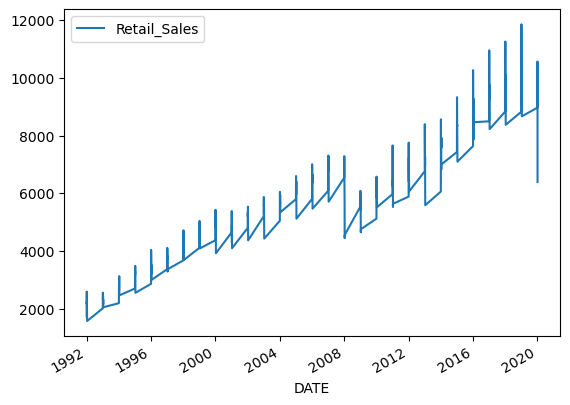

In [79]:
df.plot()
plt.show()

In [80]:
df_train = df.iloc[:-12]
df_test = df.iloc[-12:]

In [81]:
df_train.head()

,Retail_Sales
DATE,
1992-01-01,1744
1992-01-02,1990
1992-01-03,2177
1992-01-04,2601
1992-01-05,2171


In [82]:
model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit()

C:\Users\VTADOORI\Software\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [83]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:             Retail_Sales   No. Observations:                  328
Model:             ExponentialSmoothing   SSE                       23367163.100
Optimized:                         True   AIC                           3697.016
Trend:                         Additive   BIC                           3757.704
Seasonal:                Multiplicative   AICC                          3699.229
Seasonal Periods:                    12   Date:                 Sat, 06 Jan 2024
Box-Cox:                          False   Time:                         02:55:52
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3939217                alpha                 True
smoothing_trend          

In [84]:
sales_forecast = fitted.forecast(steps=12)

C:\Users\VTADOORI\Software\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


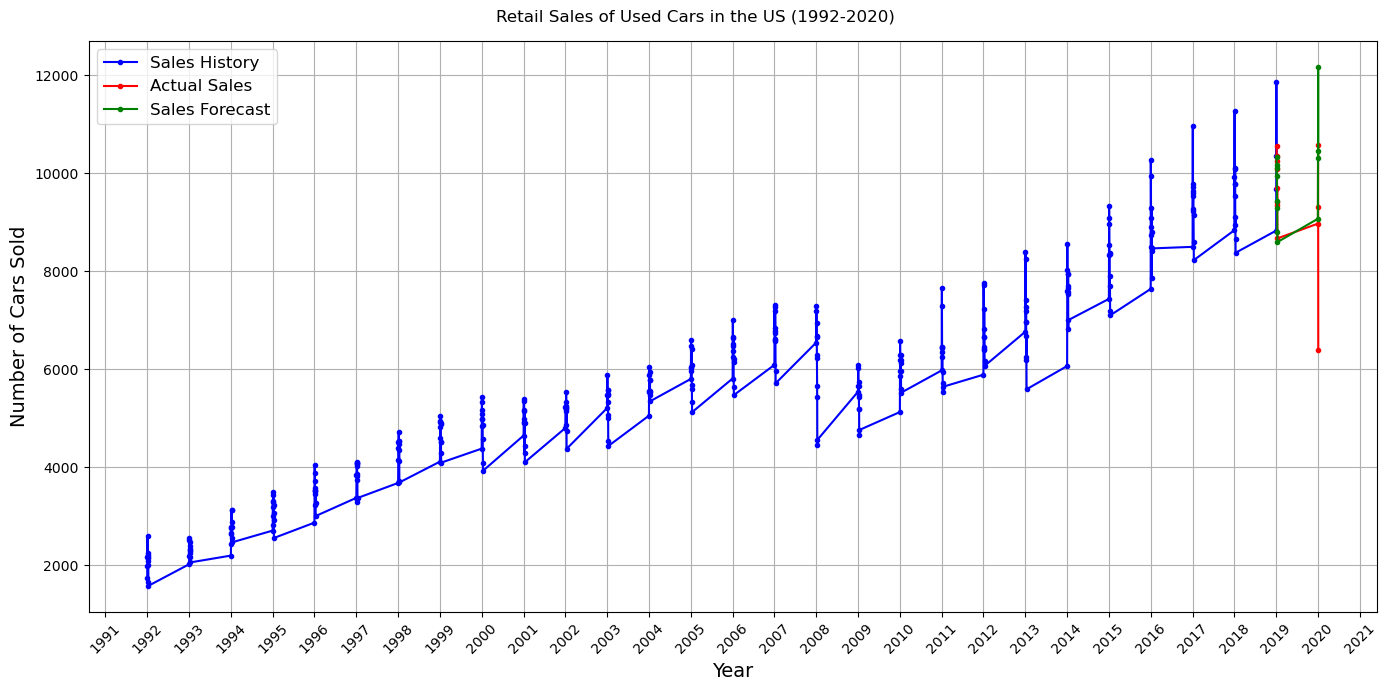

In [85]:
fig = plt.figure(figsize=(14,7), dpi=100)
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='Sales Forecast')
# Set x-axis major locator and formatter
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Set axis labels and legend
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cars Sold', fontsize=14)
plt.legend(handles=[past, future, predicted_future], fontsize=12)

# Show gridlines
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()